# Predictive Analysis Using Python - Basics

## Predictive analysis uses historical data to predict future outcomes. Python provides powerful libraries to build predictive models easily. 

In [48]:
# Step 1. Install Required Libraries
# First, install essential Python libraries.

%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Step 2: Load & Explore Data
# Use pandas to load and explore your dataset.

import pandas as pd

# Load dataset
data = pd.read_csv("/home/bipinhyoju/Downloads/csv files/sales_data1.csv")

# Display first 5 rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# This step helps you understand the structure and cleanliness of the dataset.

   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Re

In [50]:
# Step 3. Data Preprocessing
# Before building the model, clean and prepare the data.

# Handle Missing Values
# We use the mean of each column to fill in missing values (if any).

data['Sales_Amount'].fillna(data['Sales_Amount'].mean(), inplace= True)
data['Quantity_Sold'].fillna(data['Quantity_Sold'].mean(), inplace= True)

# This prevents errors during model training and ensures more reliable predictions.

/tmp/ipykernel_835507/1954958151.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sales_Amount'].fillna(data['Sales_Amount'].mean(), inplace= True)
/tmp/ipykernel_835507/1954958151.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [51]:
# Select features (X) and target (y)

X = data[['Quantity_Sold']] # The input Features (independent variables)
y = data['Sales_Amount'] # Target variable (what we want to predict)

In [52]:
# Step 4: Train a Predictive Model
# Now we build a Linear Regression model using scikit-learn.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Step 5: Evaluate the Model
# Once the model is trained, assess its performance using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 9378964.52


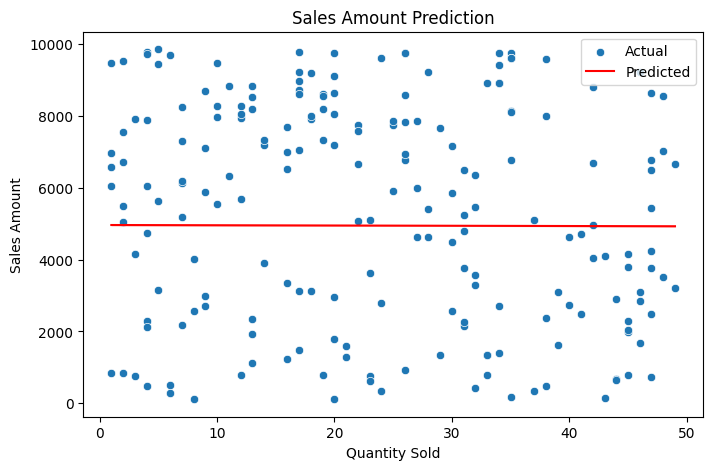

In [54]:
# Step 6: Visualize the Prediction

# Plot the regression line along with actual data points for better understanding.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x= X_test['Quantity_Sold'], y= y_test, label= 'Actual')
sns.lineplot(x= X_test['Quantity_Sold'], y= y_pred, color= 'red', label= 'Predicted')
plt.title('Sales Amount Prediction')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [55]:
# Step 7: Make New Predictions

# You can now use the model to predict Sales Amount based on any new value of Quantity Sold.

new_quantity = [[25]] # Example: Predict for Quantity_Sold = 25
predicted_sales = model.predict(new_quantity)
print(f"Predicted Sales Amount: {predicted_sales[0]:.2f}")

Predicted Sales Amount: 4942.63


/home/bipinhyoju/virtual_environment_directory/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
# Summary of the Pipeline

# Step 1: Install Libraries -> Set up the Python environment with needed libraries.
# Step 2: Load & Explore Data -> Load the CSV and examine structure and missing values.
# Step 3: Preprocess the Data -> Fill missing values and define features & target.
# Step 4: Train Model -> Use Linear Regression to model the relationship.
# Step 5: Evaluate Model -> Use MSE to assess accuracy.
# Step 6: Visualize Results -> Plot actual vs predicted values
# Step 7: Make Predictions -> Predict outcomes for new input data.